# HOUSING DATA

> A simple yet challenging project, to predict the housing price based on certain factors like house area, bedprice, furnished, nearness to mainroad, etc. 
The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. 

## FEATURE DESCRIPTION

> Data Dictionary:
>- price: Price of the Houses
>- area:Area of a House
>- bedprice: Number of House Bedprice
>- bathprice: Number if Bathprice
>- stories: Number of House Stories
>- mainroad: Wether connected to Main Road
>- guestroom: Wether has a guest room
>- basement: Wether has a basement
>- hotwaterheating: Wether has a hotwater heater
>- airconditioning: Wether has an airconditioning
>- parking: Number of House Parkings
>- prefarea: Prefarea of the House
>- furnishingstatus: Furnishing status of the House

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import statsmodels.api as sm

# import library untuk encoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# import library untuk scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# import library untuk selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

#import library untuk modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

# import vif dari statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

## OVERVIEW

> load semua datanya

In [2]:
df = pd.read_csv("../Data/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

> Data sudah bersih dari null values dan sesuai dengan tipe datanya.

## PREPROCESSING

### DETECTING & HANDLING OUTLIERS

> Kita cek outliers pada data numerik saja

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


> Numerical Data : price, area, bedrooms, bathrooms, stories, parking

#### price

> Detecting price menggunakan Boxplot

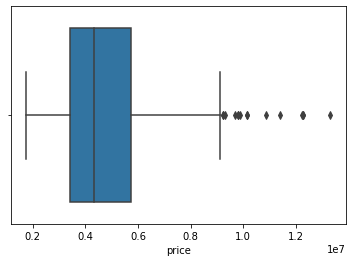

In [8]:
sns.boxplot(df["price"])
plt.show()

In [9]:
# Hitung nilai IQR dan batas atas
iqr = df["price"].quantile(.75) - df['price'].quantile(.25)
upper_limit = df["price"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 9205000.0


In [10]:
# cari batas quantile untuk winsorize
df["price"].quantile(.97)

9055199.999999993

In [11]:
# gunakan winsorize dengan bantuan scipy
df["price"] = stats.mstats.winsorize(df["price"], limits = (0, 0.03))

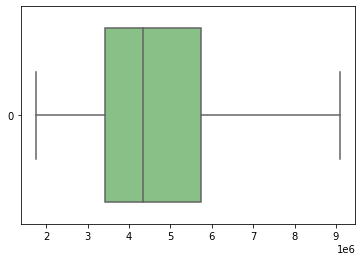

In [12]:
# visualisasi dengan boxplot
sns.boxplot(data = df["price"], palette = "Accent", orient = 'h')
plt.show()

#### area

> Detecting area menggunakan Boxplot

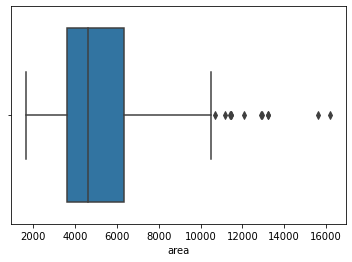

In [13]:
sns.boxplot(df["area"])
plt.show()

In [14]:
# Hitung nilai IQR dan batas atas
iqr = df["area"].quantile(.75) - df['area'].quantile(.25)
upper_limit = df["area"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 10500.0


In [15]:
# cari batas quantile untuk winsorize
df["area"].quantile(.97)

10259.72

In [16]:
# gunakan winsorize dengan bantuan scipy
df["area"] = stats.mstats.winsorize(df["area"], limits = (0, 0.03))

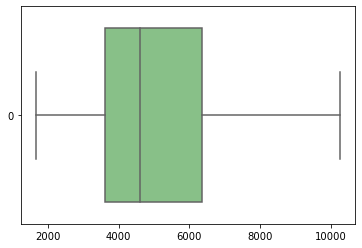

In [17]:
# visualisasi dengan boxplot
sns.boxplot(data = df["area"], palette = "Accent", orient = 'h')
plt.show()

#### bedrooms

> Detecting bedrooms menggunakan Boxplot

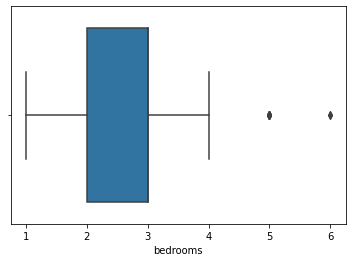

In [18]:
sns.boxplot(df["bedrooms"])
plt.show()

In [19]:
# Hitung nilai IQR dan batas atas
iqr = df["bedrooms"].quantile(.75) - df['bedrooms'].quantile(.25)
upper_limit = df["bedrooms"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 4.5


In [20]:
# cari batas quantile untuk winsorize
df["bedrooms"].quantile(.97)

4.0

In [21]:
# gunakan winsorize dengan bantuan scipy
df["bedrooms"] = stats.mstats.winsorize(df["bedrooms"], limits = (0, 0.03))

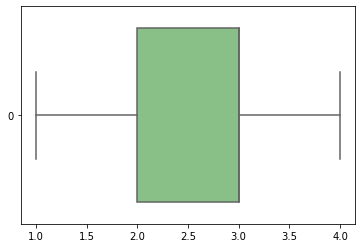

In [22]:
# visualisasi dengan boxplot
sns.boxplot(data = df["bedrooms"], palette = "Accent", orient = 'h')
plt.show()

#### bathrooms

> Detecting bathrooms menggunakan Boxplot

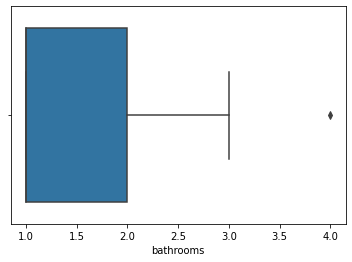

In [23]:
sns.boxplot(df["bathrooms"])
plt.show()

In [24]:
# Hitung nilai IQR dan batas atas
iqr = df["bathrooms"].quantile(.75) - df['bathrooms'].quantile(.25)
upper_limit = df["bathrooms"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 3.5


In [25]:
# cari batas quantile untuk winsorize
df["bathrooms"].quantile(.99)

3.0

In [26]:
# gunakan winsorize dengan bantuan scipy
df["bathrooms"] = stats.mstats.winsorize(df["bathrooms"], limits = (0, 0.01))

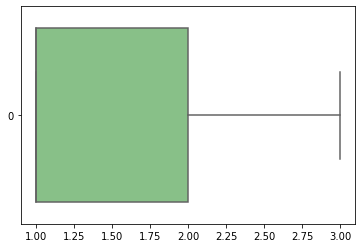

In [27]:
# visualisasi dengan boxplot
sns.boxplot(data = df["bathrooms"], palette = "Accent", orient = 'h')
plt.show()

#### stories

> Detecting stories menggunakan Boxplot

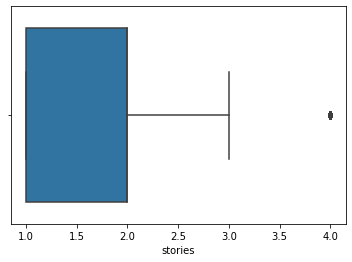

In [28]:
sns.boxplot(df["stories"])
plt.show()

In [29]:
# Hitung nilai IQR dan batas atas
iqr = df["stories"].quantile(.75) - df['stories'].quantile(.25)
upper_limit = df["stories"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 3.5


In [30]:
# cari batas quantile untuk winsorize
df["stories"].quantile(.92)

3.0

In [31]:
# gunakan winsorize dengan bantuan scipy
df["stories"] = stats.mstats.winsorize(df["stories"], limits = (0, 0.08))

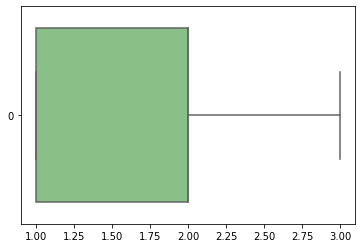

In [32]:
# visualisasi dengan boxplot
sns.boxplot(data = df["stories"], palette = "Accent", orient = 'h')
plt.show()

#### parking

> Detecting parking menggunakan Boxplot

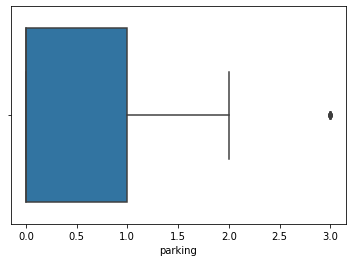

In [33]:
sns.boxplot(df["parking"])
plt.show()

In [34]:
# Hitung nilai IQR dan batas atas
iqr = df["parking"].quantile(.75) - df['parking'].quantile(.25)
upper_limit = df["parking"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 2.5


In [35]:
# cari batas quantile untuk winsorize
df["parking"].quantile(.97)

2.0

In [36]:
# gunakan winsorize dengan bantuan scipy
df["parking"] = stats.mstats.winsorize(df["parking"], limits = (0, 0.03))

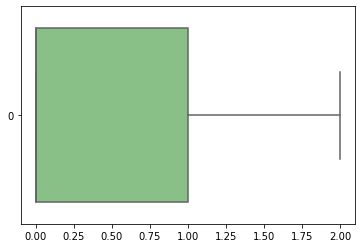

In [37]:
# visualisasi dengan boxplot
sns.boxplot(data = df["parking"], palette = "Accent", orient = 'h')
plt.show()

> Semua features sudah bersih dari outliers

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## FEATURE ENGINEERING

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9100000,8960,4,3,3,yes,no,no,no,yes,2,no,furnished
2,9100000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9100000,7500,4,2,2,yes,no,yes,no,yes,2,yes,furnished
4,9100000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### FEATURE ENCODING

#### ONE-HOT ENCODING

> Menggunakan one-hot encoding pada features mainroad, guestroom, basement, hotwaterheating, airconditioning, dan prefarea

In [40]:
df_enc = df.select_dtypes(exclude = "int64").drop(columns = ["furnishingstatus"])

In [41]:
for i in df_enc :
    df = pd.get_dummies(df, prefix = i, columns=[i], drop_first = True)

In [42]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,9100000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,9100000,8960,4,3,3,2,furnished,1,0,0,0,1,0
2,9100000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1
3,9100000,7500,4,2,2,2,furnished,1,0,1,0,1,1
4,9100000,7420,4,1,2,2,furnished,1,1,1,0,1,0


#### ORDINAL ENCODING

> Menggunakan ordinal encoding pada features furnishingstatus

In [43]:
# gunakan fit_transform untuk encode data
df["furnishingstatus_enc"] = OrdinalEncoder().fit_transform(df[["furnishingstatus"]])

In [44]:
# cek hasil
df.groupby(["furnishingstatus", "furnishingstatus_enc"])["parking"].count()

furnishingstatus  furnishingstatus_enc
furnished         0.0                     140
semi-furnished    1.0                     227
unfurnished       2.0                     178
Name: parking, dtype: int64

> By default library ini akan mengurutkan berdasarkan abjad. Maka dari itu kita melakukan pengurutan manual terlebihdahulu

In [45]:
# menentukan urutannya (target guided)
# class_order = ["unfurnished", "semi-furnished", "furnished"]
# gunakan estimasi pada fit_transform untuk encode data dengan urutan
df["furnishingstatus_enc"] = OrdinalEncoder(categories = [["unfurnished", "semi-furnished", "furnished"]]).fit_transform(df[["furnishingstatus"]])

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc
0,9100000,7420,4,2,3,2,furnished,1,0,0,0,1,1,2.0
1,9100000,8960,4,3,3,2,furnished,1,0,0,0,1,0,2.0
2,9100000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1,1.0
3,9100000,7500,4,2,2,2,furnished,1,0,1,0,1,1,2.0
4,9100000,7420,4,1,2,2,furnished,1,1,1,0,1,0,2.0


> Drop features asal-nya.

In [47]:
df = df.drop(columns = ["furnishingstatus"])

In [48]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc
0,9100000,7420,4,2,3,2,1,0,0,0,1,1,2.0
1,9100000,8960,4,3,3,2,1,0,0,0,1,0,2.0
2,9100000,9960,3,2,2,2,1,0,1,0,0,1,1.0
3,9100000,7500,4,2,2,2,1,0,1,0,1,1,2.0
4,9100000,7420,4,1,2,2,1,1,1,0,1,0,2.0


### FEATURE SCALING

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 545 non-null    int64  
 1   area                  545 non-null    int64  
 2   bedrooms              545 non-null    int64  
 3   bathrooms             545 non-null    int64  
 4   stories               545 non-null    int64  
 5   parking               545 non-null    int64  
 6   mainroad_yes          545 non-null    uint8  
 7   guestroom_yes         545 non-null    uint8  
 8   basement_yes          545 non-null    uint8  
 9   hotwaterheating_yes   545 non-null    uint8  
 10  airconditioning_yes   545 non-null    uint8  
 11  prefarea_yes          545 non-null    uint8  
 12  furnishingstatus_enc  545 non-null    float64
dtypes: float64(1), int64(6), uint8(6)
memory usage: 33.1 KB


> Kita akan melakukan feature scaling pada numerical features.

> Disini kita akan scaling price, area, bedrooms, bathrooms, stories, dan parking menggunakan MinMaxScaler

In [50]:
# min max scaler
scaler = MinMaxScaler()

In [51]:
column_name = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]

In [52]:
for i in column_name:
    df[i +'_minmax'] = scaler.fit_transform(df[[i]])

In [53]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc,price_minmax,area_minmax,bedrooms_minmax,bathrooms_minmax,stories_minmax,parking_minmax
0,9100000,7420,4,2,3,2,1,0,0,0,1,1,2.0,1.0,0.669451,1.000000,0.5,1.0,1.0
1,9100000,8960,4,3,3,2,1,0,0,0,1,0,2.0,1.0,0.848126,1.000000,1.0,1.0,1.0
2,9100000,9960,3,2,2,2,1,0,1,0,0,1,1.0,1.0,0.964149,0.666667,0.5,0.5,1.0
3,9100000,7500,4,2,2,2,1,0,1,0,1,1,2.0,1.0,0.678733,1.000000,0.5,0.5,1.0
4,9100000,7420,4,1,2,2,1,1,1,0,1,0,2.0,1.0,0.669451,1.000000,0.0,0.5,1.0


> Drop features asal-nya.

In [54]:
df = df.drop(columns = column_name)

In [55]:
df.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_enc,price_minmax,area_minmax,bedrooms_minmax,bathrooms_minmax,stories_minmax,parking_minmax
0,1,0,0,0,1,1,2.0,1.0,0.669451,1.000000,0.5,1.0,1.0
1,1,0,0,0,1,0,2.0,1.0,0.848126,1.000000,1.0,1.0,1.0
2,1,0,1,0,0,1,1.0,1.0,0.964149,0.666667,0.5,0.5,1.0
3,1,0,1,0,1,1,2.0,1.0,0.678733,1.000000,0.5,0.5,1.0
4,1,1,1,0,1,0,2.0,1.0,0.669451,1.000000,0.0,0.5,1.0


### FEATURE SELECTION

#### EMBEDDED METHOD (FEATURE IMPORTANCES)

In [56]:
# split dependent dan independent (target)
X = df.drop(columns=["price_minmax"])# independent feature, non target
y = df["price_minmax"] # target

In [57]:
# embedded method dengan ExtraTree
model = ExtraTreesRegressor()
model.fit(X,y) # fit model
print(model.feature_importances_) # gunakan inbuilt class: feature_importances

[0.03206452 0.03286896 0.03851319 0.0221033  0.1461345  0.04817986
 0.06600888 0.24384041 0.05197868 0.20360091 0.05286697 0.0618398 ]


In [58]:
# hasil feature importances
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10)

area_minmax             0.243840
bathrooms_minmax        0.203601
airconditioning_yes     0.146135
furnishingstatus_enc    0.066009
parking_minmax          0.061840
stories_minmax          0.052867
bedrooms_minmax         0.051979
prefarea_yes            0.048180
basement_yes            0.038513
guestroom_yes           0.032869
dtype: float64

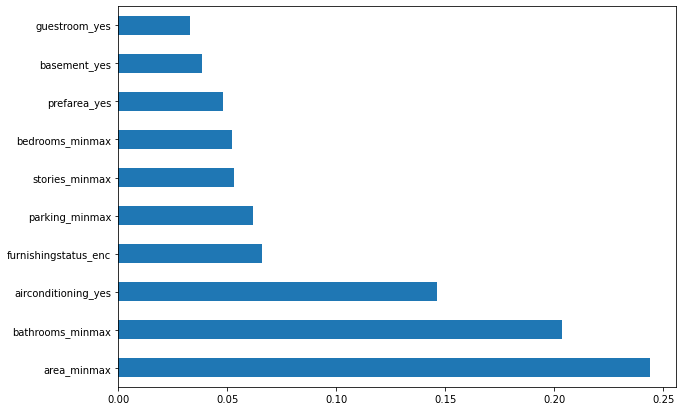

In [59]:
# plot hasil feature importances
plt.figure(figsize = (10,7))
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [60]:
# masukkan hasil kedalam dataframe baru.
col = feat_importances.nlargest(10).index.tolist()

col.append("price_minmax")

df_new = df[col]

In [61]:
df_new.head()

,area_minmax,bathrooms_minmax,airconditioning_yes,furnishingstatus_enc,parking_minmax,stories_minmax,bedrooms_minmax,prefarea_yes,basement_yes,guestroom_yes,price_minmax
0,0.669451,0.5,1,2.0,1.0,1.0,1.000000,1,0,0,1.0
1,0.848126,1.0,1,2.0,1.0,1.0,1.000000,0,0,0,1.0
2,0.964149,0.5,0,1.0,1.0,0.5,0.666667,1,1,0,1.0
3,0.678733,0.5,1,2.0,1.0,0.5,1.000000,1,1,0,1.0
4,0.669451,0.0,1,2.0,1.0,0.5,1.000000,0,1,1,1.0


## MODELING

In [62]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_minmax           545 non-null    float64
 1   bathrooms_minmax      545 non-null    float64
 2   airconditioning_yes   545 non-null    uint8  
 3   furnishingstatus_enc  545 non-null    float64
 4   parking_minmax        545 non-null    float64
 5   stories_minmax        545 non-null    float64
 6   bedrooms_minmax       545 non-null    float64
 7   prefarea_yes          545 non-null    uint8  
 8   basement_yes          545 non-null    uint8  
 9   guestroom_yes         545 non-null    uint8  
 10  price_minmax          545 non-null    float64
dtypes: float64(7), uint8(4)
memory usage: 32.1 KB


### LINEAR

#### 1. MULTIPLE LINEAR REGRESSION

> Kita harus lakukan beberapa uji asumsi klasik :
> 1. Linearity test, yaitu menguji apakah variabel X dan y berkolerasi linear. Kita dapat gunakan uji korelasi pearson, spearman, pairplot atau scatterplot.
> 2. Normality (GOF) test, yaitu menguji apakah variabel berdistribusi normal (parametrik). Kita dapat gunakan test d'agostino(), Shapiro() atau QQ-plot.
> 3. Multicolinearity, yaitu adanya korelasi yg kuat antar sesama variabel dependent (X). Kita dapat gunakan variance_inflation_factor() atau korelasi heatmap.
> 4. Homoscedasticity, yaitu keadaan dimana variance tiap nilai residual (error) konstan. Kita dapat gunakan test bartlett(), levene() atau ANOVA.

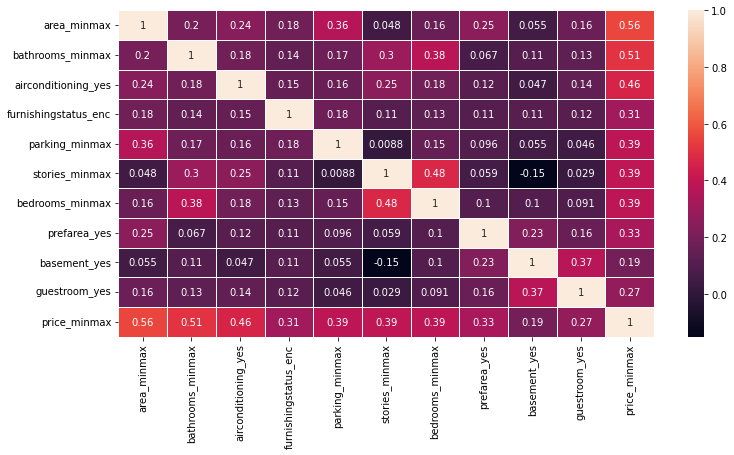

In [63]:
# cek korelasi dengan heatmap (menggunakan pearson untuk melihat linearity)
plt.figure(figsize = (12,6))
sns.heatmap(df_new.corr('pearson'), linewidths=0.5, annot = True)
plt.show()

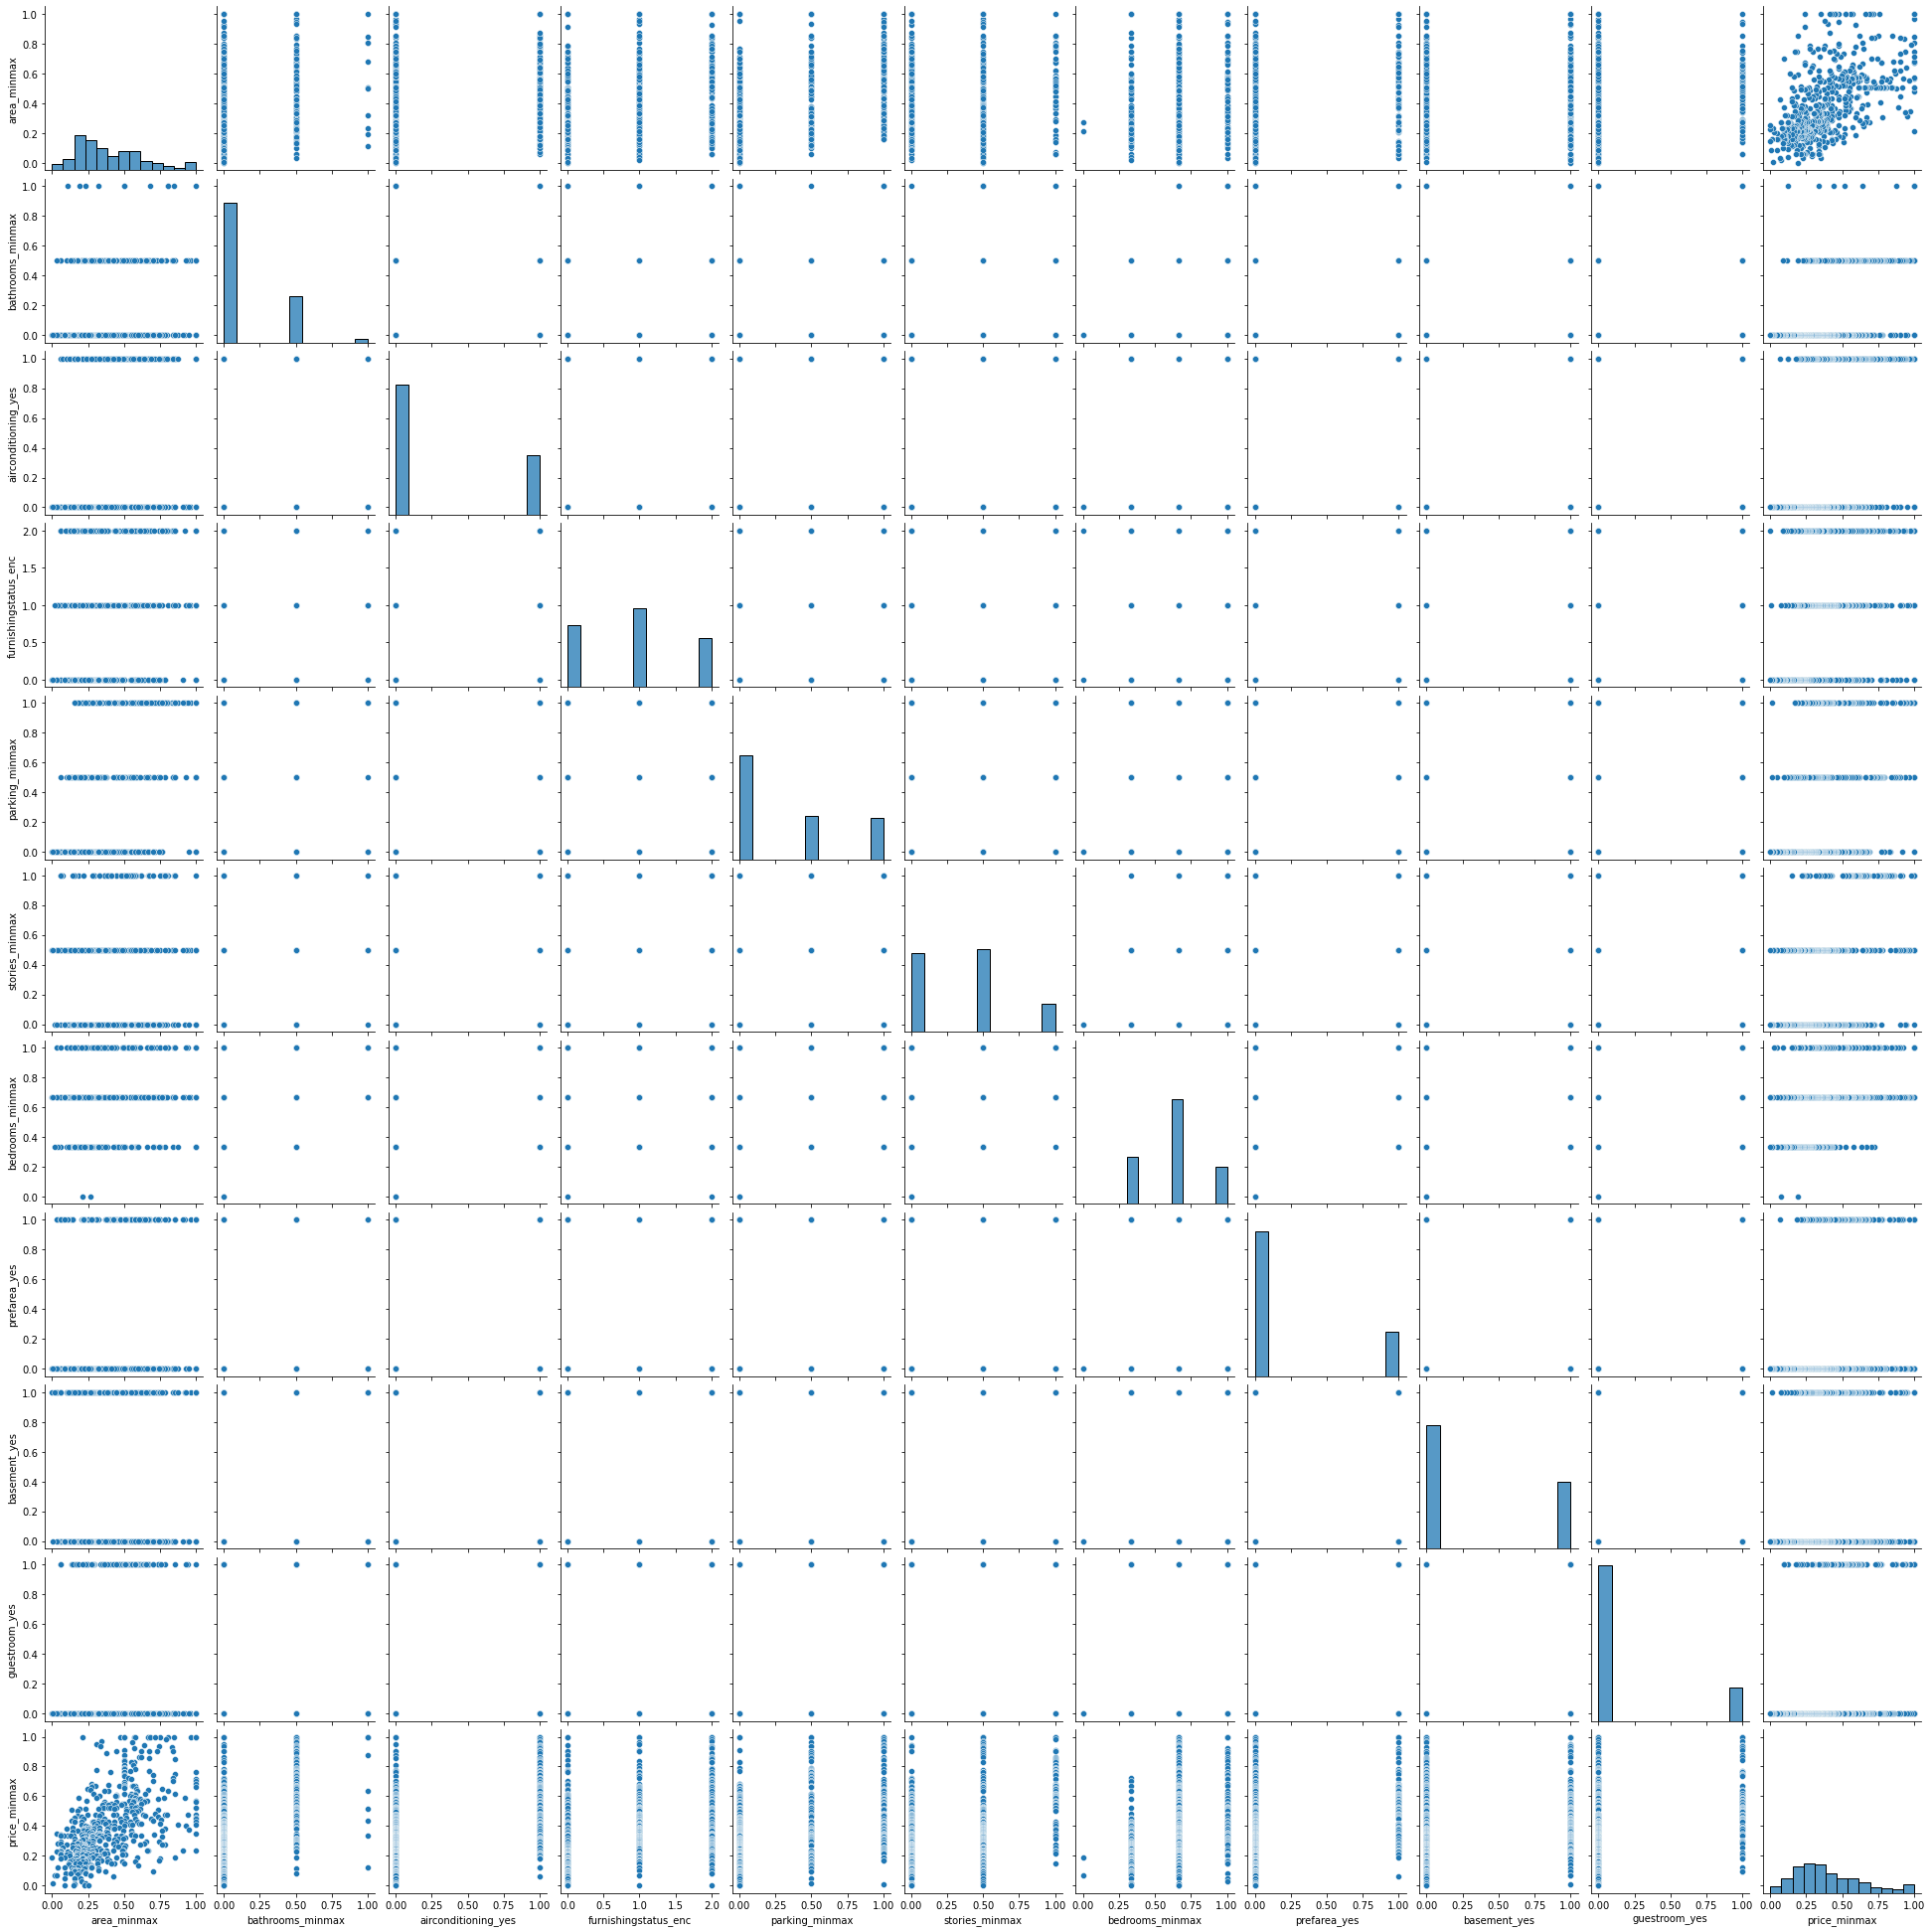

In [64]:
# cek korelasi dengan pairplot
sns.pairplot(df_new)
plt.show()

In [65]:
# fungsi untuk GOF test dengan d'agostino
def gof_agostino(data, col):
    k2, p_value = stats.normaltest(data[col])
    if(p_value < 0.05):
        return(f"{col} - Distribution is not Normal (Reject Null Hypothesis)\n")
    else:
        return(f"{col} - Distribution is Normal (Fail to Reject Null Hypothesis)\n")

In [66]:
# cek hasil GOF
for i in df_new:
    print(gof_agostino(df_new, i))

area_minmax - Distribution is not Normal (Reject Null Hypothesis)

bathrooms_minmax - Distribution is not Normal (Reject Null Hypothesis)

airconditioning_yes - Distribution is not Normal (Reject Null Hypothesis)

furnishingstatus_enc - Distribution is not Normal (Reject Null Hypothesis)

parking_minmax - Distribution is not Normal (Reject Null Hypothesis)

stories_minmax - Distribution is not Normal (Reject Null Hypothesis)

bedrooms_minmax - Distribution is not Normal (Reject Null Hypothesis)

prefarea_yes - Distribution is not Normal (Reject Null Hypothesis)

basement_yes - Distribution is not Normal (Reject Null Hypothesis)

guestroom_yes - Distribution is not Normal (Reject Null Hypothesis)

price_minmax - Distribution is not Normal (Reject Null Hypothesis)



> Dari hasil GOF Test diatas bisa kita katakan bahwa data ini tidak cocok digunakan untuk model Linear karena distribusinya tidak normal.

In [67]:
# cek multicol dengan vif
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns

In [68]:
# cari nilai vif dengan loop
vif_vals=[]
for i in range(len(df_new.columns)):
    vif_vals.append(variance_inflation_factor(df_new.values, i))

In [69]:
# apply nilai
vif_data["VIF"] = vif_vals

In [70]:
# cek hasil
vif_data

,feature,VIF
0,area_minmax,5.974535
1,bathrooms_minmax,1.846079
2,airconditioning_yes,1.888357
3,furnishingstatus_enc,2.685004
4,parking_minmax,2.130148
5,stories_minmax,3.419088
6,bedrooms_minmax,7.072551
7,prefarea_yes,1.551703
8,basement_yes,2.026095
9,guestroom_yes,1.496613


> Sebaiknya kita memilih VIF yang bernilai <5, tetapi VIF < 10 juga masih dapat diterima.

> Maka dengan asumsi tersebut dapat dikatakan bahwa variabel price_minmax  memiliki multikolinearitas.

In [71]:
# homoscedasticity test dengan levene
def levene_test(data, dep, indep):
    w_stats, p_value = stats.levene(data[dep], data[indep])
    if(p_value < 0.05):
        return(f"{dep} and {indep} - Variance is not equal (Reject Null Hypothesis)\n")
    else:
        return(f"{dep} and {indep} - Variance is equal (Fail to Reject Null Hypothesis)\n")

In [72]:
# cek hasil homoscedasticity
for i in df_new.drop(columns = "price_minmax"):
    print(levene_test(df_new, "price_minmax", i))

price_minmax and area_minmax - Variance is equal (Fail to Reject Null Hypothesis)

price_minmax and bathrooms_minmax - Variance is not equal (Reject Null Hypothesis)

price_minmax and airconditioning_yes - Variance is not equal (Reject Null Hypothesis)

price_minmax and furnishingstatus_enc - Variance is not equal (Reject Null Hypothesis)

price_minmax and parking_minmax - Variance is not equal (Reject Null Hypothesis)

price_minmax and stories_minmax - Variance is not equal (Reject Null Hypothesis)

price_minmax and bedrooms_minmax - Variance is not equal (Reject Null Hypothesis)

price_minmax and prefarea_yes - Variance is not equal (Reject Null Hypothesis)

price_minmax and basement_yes - Variance is not equal (Reject Null Hypothesis)

price_minmax and guestroom_yes - Variance is equal (Fail to Reject Null Hypothesis)



> Bisa kita lihat diatas, feature area_minmax dan guestroom_yes memiliki variance yg sama dengan price_minmax

In [73]:
# split target variable
X = df_new.drop(columns = ["price_minmax"]).values
y = df_new["price_minmax"].values.reshape(-1,1)

In [74]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [75]:
# model train dan fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# nilai slope dan intercept
print("slope:", model.coef_)
print("intercept:", model.intercept_)

slope: [[0.32761651 0.26466626 0.10196874 0.03519368 0.07476216 0.14660872
  0.03421376 0.07862127 0.03807874 0.06043118]]
intercept: [0.02877381]


> Maka kita dapat simpulkan hasil model adalah :

> price_minmax = 0.02877 + (0.3276 * X1) + (0.2646 * X2) + (0.1019 * X3) + .. dst

In [77]:
# buat ypredict
y_pred = model.predict(X_test)

In [78]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()

for i in range (10):
    result[f"X{i+1}"] = [j[i] for j in X_test]

result["y_act"] = [i for i in y_test.flatten()]
result["y_pred"] = y_pred.flatten()

In [79]:
#cek hasil
result.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y_act,y_pred
0,0.272653,0.0,0.0,2.0,0.5,0.5,0.666667,0.0,0.0,0.0,0.385714,0.321982
1,0.924701,0.0,0.0,2.0,1.0,0.0,0.666667,1.0,1.0,0.0,0.589524,0.616380
2,0.210001,0.0,1.0,1.0,0.0,0.5,1.000000,0.0,0.0,0.0,0.307143,0.342254
3,1.000000,0.0,0.0,2.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.704762,0.513642
4,0.233206,0.0,0.0,0.0,0.0,0.5,1.000000,0.0,0.0,0.0,0.161905,0.212694


##### MODEL SCORE

In [80]:
# gunakan r2_score dari sklearn untuk melihat r2 scorenya
round(metrics.r2_score(y_test, y_pred), 2)

0.65

> Dari hasil diatas , dapat disimpulkan bahwa variabel X1 sampai dengan X10 berpengaruh secara bersama sama terhadap variabel y (price_minmax) sebesar 65% (0.65).
Sedangkan sisanya dipengaruhi oleh variabel lain diluar persamaan ini

##### MODEL EVALUATION

In [81]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE):  0.09084143332081497


### NON LINEAR

#### DECISION TREE

In [82]:
df_new.head()

,area_minmax,bathrooms_minmax,airconditioning_yes,furnishingstatus_enc,parking_minmax,stories_minmax,bedrooms_minmax,prefarea_yes,basement_yes,guestroom_yes,price_minmax
0,0.669451,0.5,1,2.0,1.0,1.0,1.000000,1,0,0,1.0
1,0.848126,1.0,1,2.0,1.0,1.0,1.000000,0,0,0,1.0
2,0.964149,0.5,0,1.0,1.0,0.5,0.666667,1,1,0,1.0
3,0.678733,0.5,1,2.0,1.0,0.5,1.000000,1,1,0,1.0
4,0.669451,0.0,1,2.0,1.0,0.5,1.000000,0,1,1,1.0


In [83]:
# split target variable
X = df_new.drop(columns = ["price_minmax"])
y = df_new["price_minmax"]

In [84]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # size test = 20%

In [85]:
# model train dan fitting
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
# buat y predict
y_pred = model.predict(X_test)

In [87]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [88]:
# cek hasil
result.head()

,y_act,y_pred
239,0.385714,0.429524
113,0.589524,0.560952
325,0.307143,0.461905
66,0.704762,0.523810
479,0.161905,0.238095


In [89]:
# evaluasi gunakan r2 score dan mae dari sklearn
print("R2 Score:", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))

R2 Score: 0.19
Mean Absolute Error (MAE):  0.14363040629095675


In [90]:
# buat kolom untuk nama feature dalam visualisasi
DT_cols = X_train.columns.tolist()

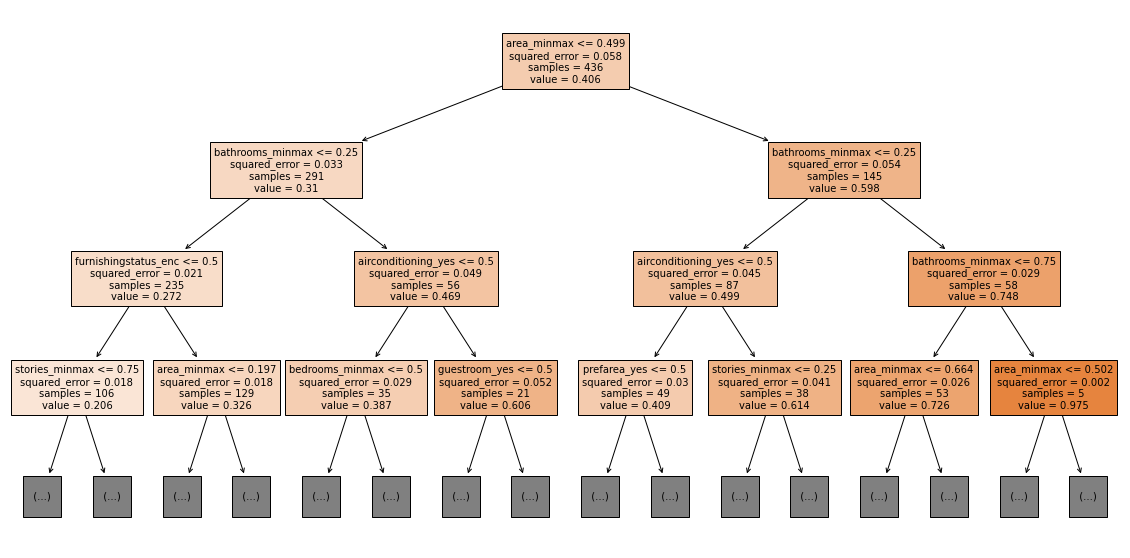

In [91]:
# plot decision tree
plt.figure(figsize = (20,10))
plot_tree(model,
          feature_names = DT_cols, impurity = True,
          fontsize = 10, max_depth = 3,
          filled = True)
plt.show()

In [92]:
# save dan buka dengan graphviz
export_graphviz(model.fit(X_train, y_train),
                out_file = 'dtree_viz.dot',
                impurity = True,
                feature_names = DT_cols)

> copy dan paste hasil out_file .dot pada link ini : http://dreampuf.github.io/GraphvizOnline